In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import math as mth

## Distribuição de Frequência Teoria

A distribuição de frequência é util quando o volume de dados for grande e queremos fazer uma análise de contagem de cada variável.

Uma distribuição de freqüência é uma tabela que mostra categorias, valores ou intervalos de valores de acordo com as ocorrências.

<img src='imagens/dist_freq_tabela.png' width='600' height='600'/>

Onde se aplica: variáveis quantitativas ou variáveis qualitativas ordinais (avaliação de servico, como bom, medio, ruim. Grau de instrução da pessoa).

A ideia é dividir os dados em classe, mas suponha que quando há muitas ocorrencias em classes iniciais, compensa-se diminuir o tamanho das que estão no fim. Exemplo: salário: o numero de pessoas diminui a medida que o salário cresce, distribuir com intervalo igual não é melhor alternativa.

Regra de Sturges para divisão de classes: <br>
1. Ordernar os Valores da Tabela.
2. Cálculo da amplitude: A= max-min
3. Cálculo do número de intervalos da tabela: K=1+ 3,322.log n (n é o tamanho da amostra)
4. Cálculo da amplitude dos intervalos: Ak=A/K (devemos arredondar para cima)<br><br>
<img src='imagens/dist_freq_tabela2.png' width='600' height='600'/>






## Implementação da distribuição de frequência

### Base de dados importacao e ordenacao

In [2]:
dados = np.array([160, 165, 167, 164, 160, 166, 160, 161, 150, 152, 173, 160, 155,
                  164, 168, 162, 161, 168, 163, 156, 155, 169, 151, 170, 164,
                  155, 152, 163, 160, 155, 157, 156, 158, 158, 161, 154, 161, 156, 172, 153])

In [3]:
dados=np.sort(dados) #ordenação

In [4]:
dados

array([150, 151, 152, 152, 153, 154, 155, 155, 155, 155, 156, 156, 156,
       157, 158, 158, 160, 160, 160, 160, 160, 161, 161, 161, 161, 162,
       163, 163, 164, 164, 164, 165, 166, 167, 168, 168, 169, 170, 172,
       173])

In [5]:
np.unique(dados, return_counts=True)

(array([150, 151, 152, 153, 154, 155, 156, 157, 158, 160, 161, 162, 163,
        164, 165, 166, 167, 168, 169, 170, 172, 173]),
 array([1, 1, 2, 1, 1, 4, 3, 1, 2, 5, 4, 1, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1],
       dtype=int64))

In [6]:
dados.min(), dados.max()

(150, 173)

<BarContainer object of 40 artists>

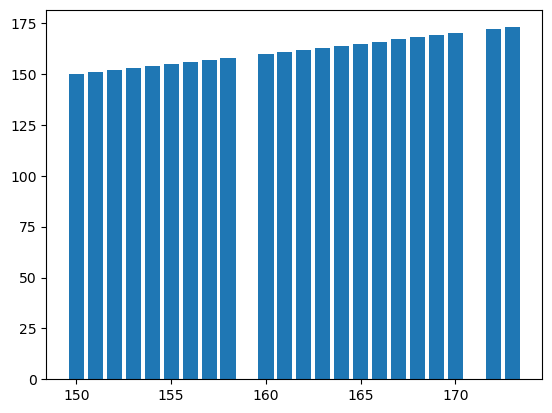

In [7]:
plt.bar(dados,dados) # dados nao agrupados por classe

### Numero de classes

In [8]:
A=dados.max()-dados.min()
K=round(1+3.332*mth.log10(dados.shape[0]))
Ak=mth.ceil(A/K)
A,K,Ak

(23, 6, 4)

### Criacao Intervalos

In [9]:
intervalos=np.arange(dados.min(),dados.max()+Ak, Ak)#soma-se algo para que nao fique de fora do range
intervalos

array([150, 154, 158, 162, 166, 170, 174])

In [10]:
intervalo=np.zeros(6).astype(int)
intervalo

array([0, 0, 0, 0, 0, 0])

In [11]:

for value in dados:
    if(value>=150 and value <154):
            k=0
            intervalo[k]+=1
    if(value>=154 and value <158):
            k=1
            intervalo[k]+=1
    if(value>=158 and value <162):
            k=2
            intervalo[k]+=1
    if(value>=162 and value <166):
            k=3
            intervalo[k]+=1
    if(value>=166 and value <170):
            k=4
            intervalo[k]+=1
    if(value>=170 and value <174):
            k=5
            intervalo[k]+=1

In [12]:
intervalo,intervalo.sum()

(array([ 5,  9, 11,  7,  5,  3]), 40)

In [13]:
lista_classes=['|150-154','|154-158','|158-162','|162-166','|166-170','|170-174']

Text(0, 0.5, 'valores')

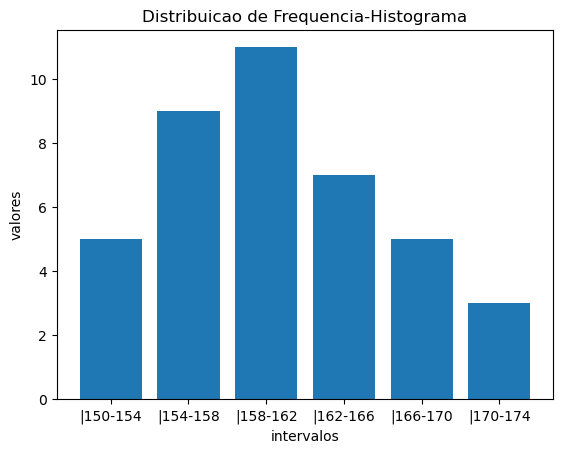

In [14]:
plt.bar(np.asarray(lista_classes),intervalo)
plt.title('Distribuicao de Frequencia-Histograma')
plt.xlabel('intervalos')
plt.ylabel('valores')

## Histograma Numpy e Matplotlib

In [15]:
dados = np.array([160, 165, 167, 164, 160, 166, 160, 161, 150, 152, 173, 160, 155,
                  164, 168, 162, 161, 168, 163, 156, 155, 169, 151, 170, 164,
                  155, 152, 163, 160, 155, 157, 156, 158, 158, 161, 154, 161, 156, 172, 153])

In [16]:
frequencia,classes=np.histogram(dados,bins=6)
classes=np.round(classes).astype(str)


In [17]:
classes.shape

(7,)

In [18]:
classes[0:6], frequencia

(array(['150.0', '154.0', '158.0', '162.0', '165.0', '169.0'], dtype='<U32'),
 array([ 5,  9, 11,  7,  5,  3], dtype=int64))

<BarContainer object of 6 artists>

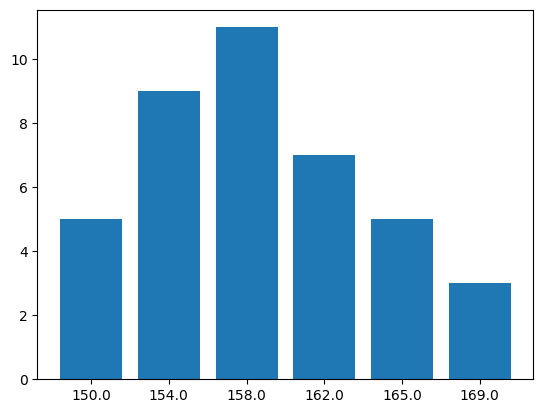

In [19]:
plt.bar(classes[0:6],frequencia)

(array([ 5.,  9., 11.,  7.,  5.,  3.]),
 array([150.        , 153.83333333, 157.66666667, 161.5       ,
        165.33333333, 169.16666667, 173.        ]),
 <BarContainer object of 6 artists>)

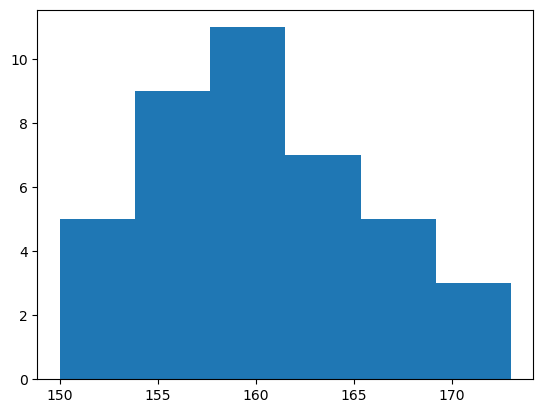

In [20]:
frequencia,classes=np.histogram(dados,bins=6) # em bins podemos escolher a tecnica usada para escolher
plt.hist(dados,bins=6)

(array([ 5.,  8.,  3., 12.,  5.,  4.,  3.]),
 array([150.        , 153.28571429, 156.57142857, 159.85714286,
        163.14285714, 166.42857143, 169.71428571, 173.        ]),
 <BarContainer object of 7 artists>)

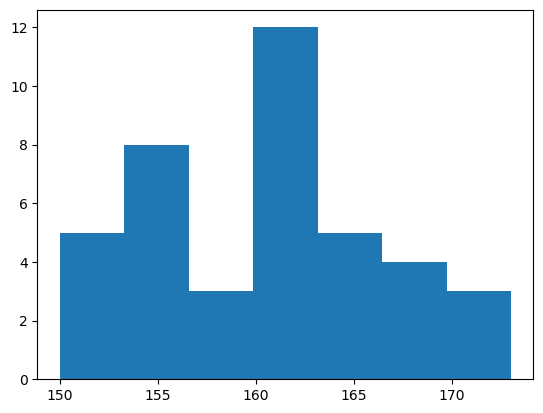

In [21]:
#usaremos o metodo de sturges para testar
frequencia_sturges,class_sturges=np.histogram(dados,bins='sturges')
plt.hist(dados,bins='sturges')

In [22]:
frequencia_sturges,class_sturges

(array([ 5,  8,  3, 12,  5,  4,  3], dtype=int64),
 array([150.        , 153.28571429, 156.57142857, 159.85714286,
        163.14285714, 166.42857143, 169.71428571, 173.        ]))

## Pandas e Seaborn

Gerar trabalhando com Dataframe

In [23]:
dataset=pd.DataFrame({'dados':dados})

<AxesSubplot:ylabel='Frequency'>

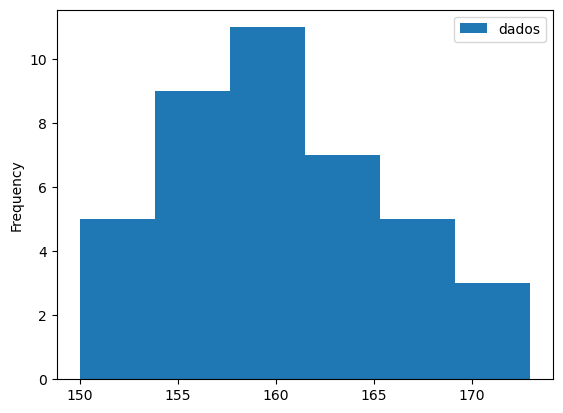

In [26]:
dataset.plot.hist(bins=6)

<AxesSubplot:ylabel='Count'>

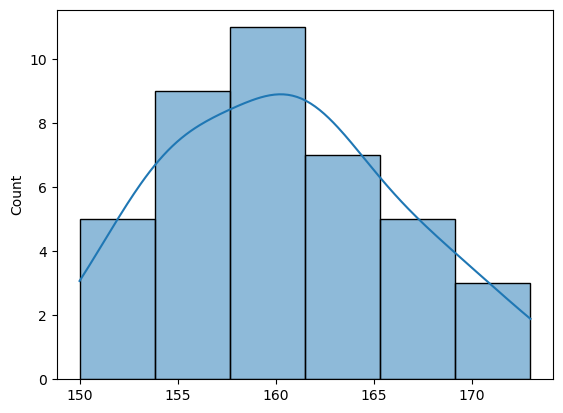

In [28]:
sns.histplot(dados,bins=6,kde=True) #kde plotagem linha de densidade

## Distribuicao Idade base Census

In [39]:
dataset_census=pd.read_csv('data_base/census.csv')
dataset_age=pd.DataFrame(dataset_census['age'])

In [40]:
dataset_age.info() #nenhum campo de idade nula

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     32561 non-null  int64
dtypes: int64(1)
memory usage: 254.5 KB


In [41]:
dataset_age.describe()

,age
count,32561.000000
mean,38.581647
std,13.640433
min,17.000000
25%,28.000000
50%,37.000000
75%,48.000000
max,90.000000


In [42]:
dataset_age.head(10)

,age
0,39
1,50
2,38
3,53
4,28
5,37
6,49
7,52
8,31
9,42


In [56]:
numpy_ages=dataset_age.values
freq,classes=np.histogram(numpy_ages,bins='sturges')
classes

array([17.    , 21.5625, 26.125 , 30.6875, 35.25  , 39.8125, 44.375 ,
       48.9375, 53.5   , 58.0625, 62.625 , 67.1875, 71.75  , 76.3125,
       80.875 , 85.4375, 90.    ])

<AxesSubplot:ylabel='Frequency'>

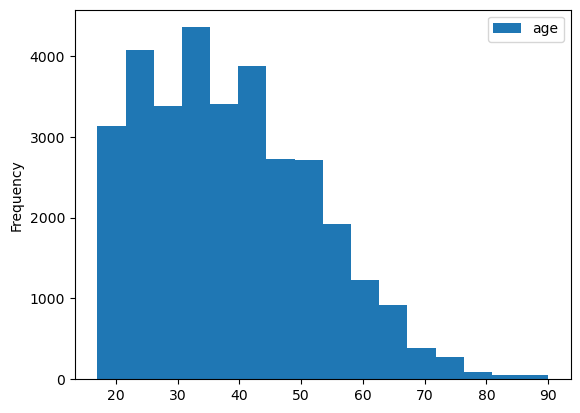

In [61]:
dataset_age.plot.hist( bins=classes.shape[0]-1)

<AxesSubplot:ylabel='Count'>

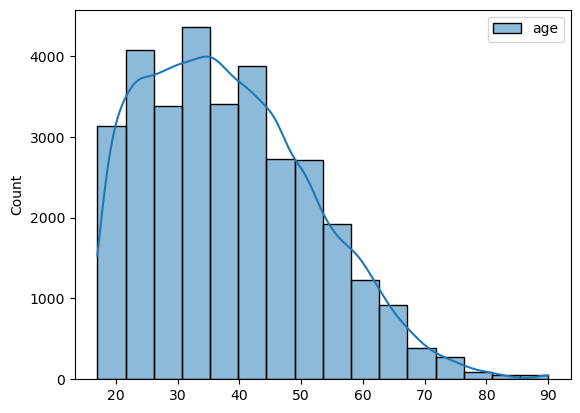

In [46]:
sns.histplot(dataset_age,kde=True, bins='sturges') #aqui sturges arredonda para baixo

(array([3130., 4066., 3376., 4353., 3399., 3876., 2722., 2716., 1924.,
        1225.,  917.,  389.,  273.,   96.,   51.,   48.]),
 array([17.    , 21.5625, 26.125 , 30.6875, 35.25  , 39.8125, 44.375 ,
        48.9375, 53.5   , 58.0625, 62.625 , 67.1875, 71.75  , 76.3125,
        80.875 , 85.4375, 90.    ]),
 <BarContainer object of 16 artists>)

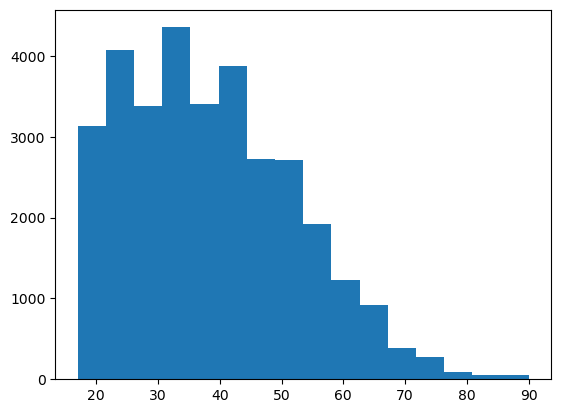

In [62]:
plt.hist(numpy_ages,bins=classes.shape[0]-1)

## Regras de Associação

Tipos de perguntas: o quanto uma variável se relaciona a outra de modo que as duas possam maximizar um resultado.

Vender itens em conjuntos. <br>
Planejamento de Catálogos. <br>
Controle de evasão (exemplo:situação financeira e idade => tendência em sair do curso). <br>

### Algoritmo APRIORI

Tabela para aplicarmos o algoritmo <br>

As regras de associação permitem que elementos em um conjunto de dados sejam expressos como 𝑋→𝑌
tomando 𝑋 e 𝑌 sejam sub-conjuntos da base de dados  e não haja 𝑋∩𝑌 valores de intersecção.

Como exemplo, {café,𝑝ã𝑜}→{manteiga} dada a ocorrencia de 2 itens podemos estabelecer uma relação com um resultado de um terceiro.

<img src='imagens/regra_associoacao.png' width='400px' height='400px' />

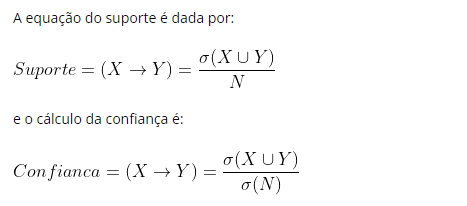

pegando como exemplo de suporte: café => pão
café que comprou pão= 3
total de café=10
suporte (café=>pão)=0,3

Confiança:
total de pão:5
vezes que há pão, pelo total de café:3 
confiação é 100%

A ideia da confiança é dividr a vezes que há pão, pelo total de café, se tivéssemos 4 compras de café e só 3 pãos, teríamos 75%

a ideia é fixarmos um suporte >= a um valor, e considerar as varíaveis que passam ela, exemplo
cerva=>pao


suporte(pão=>café) <br>
3/10=0.3 <br>

confiaça: 3 café/5pães= 0.60 ou 60% de confiaça <br>

total compra cervejas=2 <br>
total de registros=10 <br>
suporte =2/10=0.2 <br>


manteiga <br>
total de comrpas=5 <br>
total registro=10 <br>
suporte 0.5 <br>

suporte em conjunto cafe,pao

que há café e pao=3
suporte=0,3


### Implementação 

A ideia é fazer a divisão em classes e os dados trabalhados devem ser categóricos

In [118]:
dataset_apriori=dataset_census[['age','workclass','education','marital-status','relationship','occupation','sex','native-country','income']]

In [119]:
dataset_apriori

,age,workclass,education,marital-status,relationship,occupation,sex,native-country,income
0,39,State-gov,Bachelors,Never-married,Not-in-family,Adm-clerical,Male,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Husband,Exec-managerial,Male,United-States,<=50K
2,38,Private,HS-grad,Divorced,Not-in-family,Handlers-cleaners,Male,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Husband,Handlers-cleaners,Male,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Wife,Prof-specialty,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married-civ-spouse,Wife,Tech-support,Female,United-States,<=50K
32557,40,Private,HS-grad,Married-civ-spouse,Husband,Machine-op-inspct,Male,United-States,>50K
32558,58,Private,HS-grad,Widowed,Unmarried,Adm-clerical,Female,United-States,<=50K
32559,22,Private,HS-grad,Never-married,Own-child,Adm-clerical,Male,United-States,<=50K


### Dividir o Data frame em faixas com pd.cut

1° ponto a destacar é que trabalha com intervalor: <br>
[x1,xn) fechado em x1 e aberto em xn um formato diferente do comum na literatura da estatística<br>

Podemos definir intervalo assimétrico, por exemplo iremos ter 3 classes, passamos um vetor: [0,3,5,7]
criamos as classes (0, 3] < (3, 5] < (5, 7]

In [134]:
output=pd.cut(np.array([1, 7, 5, 4, 6, 3]),
       3, labels=["bad", "medium", "good"])
output # repare que as categorias sao qualitativo ordinal

['bad', 'good', 'medium', 'medium', 'good', 'bad']
Categories (3, object): ['bad' < 'medium' < 'good']

In [135]:
pd.cut(np.array([1, 7, 5, 4, 6, 3]), bins=[0,3,5,7])

[(0, 3], (5, 7], (3, 5], (3, 5], (5, 7], (0, 3]]
Categories (3, interval[int64, right]): [(0, 3] < (3, 5] < (5, 7]]

In [136]:
pd.DataFrame(pd.cut(np.array([1, 7, 5, 4, 6, 3]), 3))
#o bin foi seta em 3, logo teremos 3 divisões

,0
0,"(0.994, 3.0]"
1,"(5.0, 7.0]"
2,"(3.0, 5.0]"
3,"(3.0, 5.0]"
4,"(5.0, 7.0]"
5,"(0.994, 3.0]"


In [137]:
pd.DataFrame(pd.cut(np.array([1, 7, 5, 4, 6, 3]), bins=[0,3,5,7]))

,0
0,"(0, 3]"
1,"(5, 7]"
2,"(3, 5]"
3,"(3, 5]"
4,"(5, 7]"
5,"(0, 3]"


In [122]:
dataset_apriori['age']=pd.cut(dataset_apriori['age'], bins=[0,17,25,40,60,90], labels=['Faixa1','Faixa2','Faixa3','Faixa4','Faixa5'])

C:\Users\WILLIAM\AppData\Local\Temp\ipykernel_6912\3341691159.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_apriori['age']=pd.cut(dataset_apriori['age'], bins=[0,17,25,40,60,90], labels=['Faixa1','Faixa2','Faixa3','Faixa4','Faixa5'])


In [138]:
dataset_apriori=dataset_apriori.sample(n=1000)
dataset_apriori.head(1)

,age,workclass,education,marital-status,relationship,occupation,sex,native-country,income
5852,Faixa2,Private,Some-college,Never-married,Own-child,Machine-op-inspct,Male,United-States,<=50K


### Conversão de dataframe para lista (requisicao algoritmo a priori)

In [139]:
dataset_apriori.iloc[0,:]

age                           Faixa2
workclass                    Private
education               Some-college
marital-status         Never-married
relationship               Own-child
occupation         Machine-op-inspct
sex                             Male
native-country         United-States
income                         <=50K
Name: 5852, dtype: object

In [140]:
dataset_apriori.values[0,4]#o primeiro valor é o do registro, o segundo da coluna

' Own-child'

Temos que converter do formato pandas para o formato lista

In [141]:
registros_transform=[]
for i in range(dataset_apriori.shape[0]):
    registros_transform.append([str(dataset_apriori.values[i,j]) for j in range(dataset_apriori.shape[1]) ])

In [142]:
len(registros_transform)

1000

In [143]:
registros_transform[0:2]

[['Faixa2',
  ' Private',
  ' Some-college',
  ' Never-married',
  ' Own-child',
  ' Machine-op-inspct',
  ' Male',
  ' United-States',
  ' <=50K'],
 ['Faixa5',
  ' Private',
  ' HS-grad',
  ' Married-civ-spouse',
  ' Husband',
  ' Craft-repair',
  ' Male',
  ' United-States',
  ' <=50K']]

### Outro meio de separar em

In [129]:

test=[]
for i in range(dataset_apriori.shape[0]):
    acumula=[]
    for j in range (dataset_apriori.shape[1]):
        acumula.append(str(dataset_apriori.values[i,j]))
    test.append(acumula)
test[0:2]

[['Faixa3',
  ' Private',
  ' Some-college',
  ' Married-civ-spouse',
  ' Husband',
  ' Exec-managerial',
  ' Male',
  ' United-States',
  ' >50K'],
 ['Faixa3',
  ' Private',
  ' HS-grad',
  ' Married-civ-spouse',
  ' Husband',
  ' Transport-moving',
  ' Male',
  ' United-States',
  ' >50K']]

### Implementação do modelo

In [144]:
pip install apyori #biblioteca regras

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5955 sha256=b794657b95aa0b99dd0c26c64f8135ac619422b9379c8910e3036b1456d235e6
  Stored in directory: c:\users\william\appdata\local\pip\cache\wheels\32\2a\54\10c595515f385f3726642b10c60bf788029e8f3a1323e3913a
Successfully built apyori
Note: you may need to restart the kernel to use updated packages.


In [145]:
from apyori import apriori

In [147]:
regras_associacao=apriori(registros_transform, min_support=0.3, min_confidence=0.4)
resultados=list(regras_associacao)

In [148]:
resultados #regras criadas

[RelationRecord(items=frozenset({' <=50K'}), support=0.755, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({' <=50K'}), confidence=0.755, lift=1.0)]),
 RelationRecord(items=frozenset({' Husband'}), support=0.401, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({' Husband'}), confidence=0.401, lift=1.0)]),
 RelationRecord(items=frozenset({' Male'}), support=0.68, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({' Male'}), confidence=0.68, lift=1.0)]),
 RelationRecord(items=frozenset({' Married-civ-spouse'}), support=0.452, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({' Married-civ-spouse'}), confidence=0.452, lift=1.0)]),
 RelationRecord(items=frozenset({' Private'}), support=0.718, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({' Private'}), confidence=0.718, lift=1.0)]),
 RelationRecord(items=frozenset({' United-Sta

In [150]:
resultados[6] #aqui temos a regra ele ser homem > salario <=50, support 48.1%
#temos a regra ao contrário se salário <=50k  implaca ser homem

RelationRecord(items=frozenset({' Male', ' <=50K'}), support=0.481, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({' Male', ' <=50K'}), confidence=0.481, lift=1.0), OrderedStatistic(items_base=frozenset({' <=50K'}), items_add=frozenset({' Male'}), confidence=0.6370860927152318, lift=0.9368913128165173), OrderedStatistic(items_base=frozenset({' Male'}), items_add=frozenset({' <=50K'}), confidence=0.7073529411764705, lift=0.9368913128165173)])

In [151]:
np.unique(dataset_apriori['sex'].values, return_counts=True)

(array([' Female', ' Male'], dtype=object), array([320, 680], dtype=int64))

In [179]:
for rule in resultados:
    print(rule)
    print('--------')

RelationRecord(items=frozenset({' <=50K'}), support=0.755, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({' <=50K'}), confidence=0.755, lift=1.0)])
--------
RelationRecord(items=frozenset({' Husband'}), support=0.401, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({' Husband'}), confidence=0.401, lift=1.0)])
--------
RelationRecord(items=frozenset({' Male'}), support=0.68, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({' Male'}), confidence=0.68, lift=1.0)])
--------
RelationRecord(items=frozenset({' Married-civ-spouse'}), support=0.452, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({' Married-civ-spouse'}), confidence=0.452, lift=1.0)])
--------
RelationRecord(items=frozenset({' Private'}), support=0.718, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({' Private'}), confidence=0.718, lift=1.0)])
--------
RelationRe

#### Analise resultado[6]

RelationRecord(items=frozenset({' Male', ' <=50K'})
, support=0.481 ==> Male e <=50k apareceram 48.1%
<br>


<br>
ordered_statistics= OrderedStatistic(items_base=frozenset(), items_add=frozenset({' Male', ' <=50K'}), confidence=0.481, lift=1.0), 

<br> 
<h5> ganhar menos que 50k anul => ser homem </h5>
</br>
OrderedStatistic(items_base=frozenset({' <=50K'}), items_add=frozenset({' Male'}), confidence=0.6370860927152318, lift=0.9368913128165173)
<br>
<h5> Male => ganahr menos que 50k anual </h5>
<br>
OrderedStatistic(items_base=frozenset({' Male'}), items_add=frozenset({' <=50K'}), confidence=0.7073529411764705, lift=0.9368913128165173)])
